In [77]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn import tree 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import sklearn 
import warnings 
warnings.filterwarnings('ignore')

In [78]:
# load dataset 
data = pd.read_csv('Fraud_check.csv')

In [79]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [80]:
# renaming columns  
colRename = zip(data.columns,['undergrad','mStatus','taxIncome','cityPop','workExp','urban'])
data.rename(columns=dict(colRename),
            inplace=True)
# treating those who have 
# taxable_income <= 30000 as "Risky" and 
# others as "Good"
data.taxIncome = data.taxIncome.apply(lambda x: 'Risky' if x <= 30000 else 'Good')
data.head()

,undergrad,mStatus,taxIncome,cityPop,workExp,urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [81]:
# checking for null values 
data.isnull().sum()

undergrad    0
mStatus      0
taxIncome    0
cityPop      0
workExp      0
urban        0
dtype: int64

In [82]:
# 4 categorical columns 
# 3 numerial columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   undergrad  600 non-null    object
 1   mStatus    600 non-null    object
 2   taxIncome  600 non-null    object
 3   cityPop    600 non-null    int64 
 4   workExp    600 non-null    int64 
 5   urban      600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


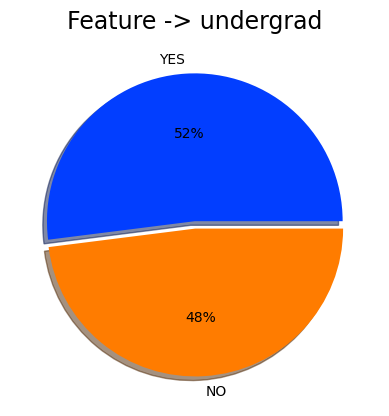

In [83]:
# undergrad data
ax = data.undergrad.value_counts().plot(kind='pie',explode=[0,0.05],
                                   colors=sns.color_palette('bright'),
                                   autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Feature -> undergrad',
          fontsize=17)
plt.show()

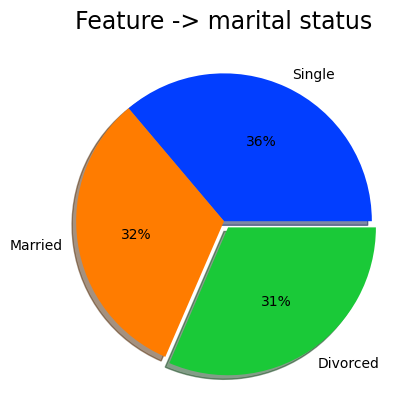

In [84]:
# marital status data
ax = data.mStatus.value_counts().plot(kind='pie',explode=[0,0,0.05],
                                   colors=sns.color_palette('bright'),
                                   autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Feature -> marital status',
          fontsize=17)
plt.show()

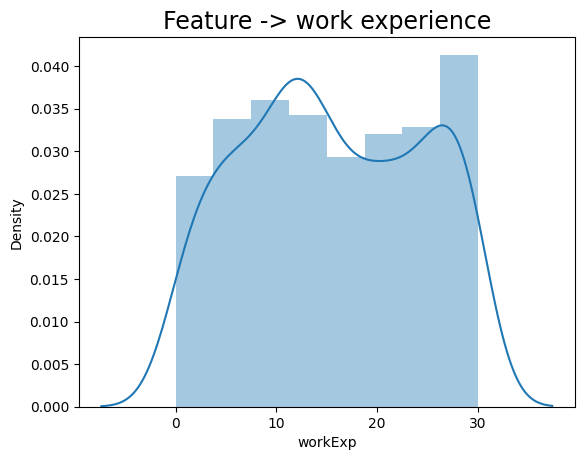

In [85]:
# work experience data
# city population data
sns.distplot(data.workExp)
plt.title('Feature -> work experience',
          fontsize=17)
plt.show()

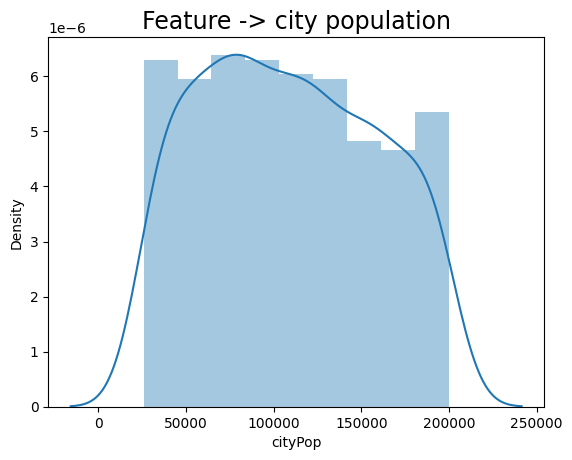

In [86]:
# city population data
sns.distplot(data.cityPop)
plt.title('Feature -> city population',
          fontsize=17)
plt.show()

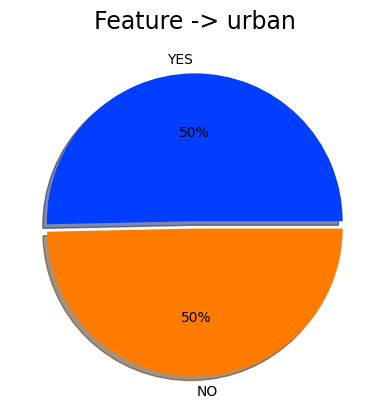

In [87]:
# urban data
ax = data.urban.value_counts().plot(kind='pie',explode=[0,0.05],
                                   colors=sns.color_palette('bright'),
                                   autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Feature -> urban',
          fontsize=17)
plt.show()

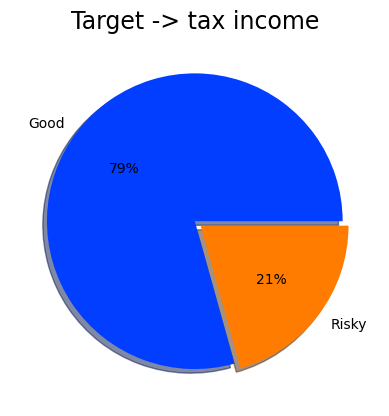

In [88]:
# target data is imbalanced 
# so don't rely on accuracy score
# tax income data
ax = data.taxIncome.value_counts().plot(kind='pie',explode=[0,0.05],
                                   colors=sns.color_palette('bright'),
                                   autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Target -> tax income',
          fontsize=17)
plt.show()

In [89]:
# perform encoding on categorical columns
for col, dtype in tuple(zip(data.dtypes.index,data.dtypes.values)):
    if dtype == 'object':
        enc = LabelEncoder()
        data[col] = enc.fit_transform(data[col])
        print(f'{col} -> {dict(zip(np.arange(enc.classes_.size),enc.classes_))}')

undergrad -> {0: 'NO', 1: 'YES'}
mStatus -> {0: 'Divorced', 1: 'Married', 2: 'Single'}
taxIncome -> {0: 'Good', 1: 'Risky'}
urban -> {0: 'NO', 1: 'YES'}


In [90]:
# transformed data 
data.head()

,undergrad,mStatus,taxIncome,cityPop,workExp,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [91]:
# feature data 
X = data.drop('taxIncome',axis=1)
# target data 'taxIncome'
Y = data[['taxIncome']]

In [92]:
# split data for training and testing 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,
                                                 random_state=42)

In [93]:
# brute force approach for 
# hyperparameter tunning 
clf = DecisionTreeClassifier(random_state=42)
param_grid = [{'criterion':["gini", "entropy", "log_loss"],
               'max_depth':[3,4,5,6]}]
grid = GridSearchCV(clf,param_grid,verbose=10)
grid.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_depth=3................................
[CV 1/5; 1/12] END .criterion=gini, max_depth=3;, score=0.781 total time=   0.0s
[CV 2/5; 1/12] START criterion=gini, max_depth=3................................
[CV 2/5; 1/12] END .criterion=gini, max_depth=3;, score=0.802 total time=   0.0s
[CV 3/5; 1/12] START criterion=gini, max_depth=3................................
[CV 3/5; 1/12] END .criterion=gini, max_depth=3;, score=0.781 total time=   0.0s
[CV 4/5; 1/12] START criterion=gini, max_depth=3................................
[CV 4/5; 1/12] END .criterion=gini, max_depth=3;, score=0.792 total time=   0.0s
[CV 5/5; 1/12] START criterion=gini, max_depth=3................................
[CV 5/5; 1/12] END .criterion=gini, max_depth=3;, score=0.781 total time=   0.0s
[CV 1/5; 2/12] START criterion=gini, max_depth=4................................
[CV 1/5; 2/12] END .criterion=gini, max_depth=4;

[CV 3/5; 12/12] END criterion=log_loss, max_depth=6;, score=0.740 total time=   0.0s
[CV 4/5; 12/12] START criterion=log_loss, max_depth=6...........................
[CV 4/5; 12/12] END criterion=log_loss, max_depth=6;, score=0.802 total time=   0.0s
[CV 5/5; 12/12] START criterion=log_loss, max_depth=6...........................
[CV 5/5; 12/12] END criterion=log_loss, max_depth=6;, score=0.781 total time=   0.0s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [3, 4, 5, 6]}],
             verbose=10)

In [94]:
print(f'Decision Tree give best training score of {round(grid.best_score_*100,2)}% with\ncriterion : {grid.best_params_["criterion"]}\nmax_depth : {grid.best_params_["max_depth"]}')

Decision Tree give best training score of 79.17% with
criterion : entropy
max_depth : 3


In [95]:
# Decision Tree Model Prunning 
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=3)
# get effective ccp_alphas for our DTC model  
c_ = model.cost_complexity_pruning_path(X_train,y_train)
# remove last ccp_values bcoz it gives trivial tree 
# ie only one node 
c = {}
c['ccp_alphas'] = c_['ccp_alphas'][:-1]
c['impurities'] = c_['impurities'][:-1]

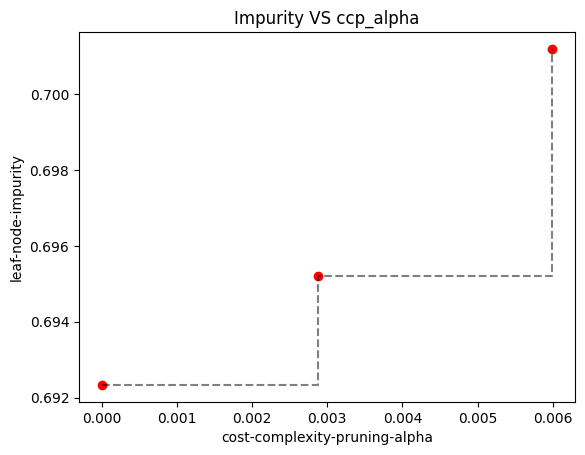

In [96]:
# impurity vs ccp_alpha plot 
plt.plot(c['ccp_alphas'],c['impurities'],
         linestyle='dashed',color='black',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],c['impurities'],
            color='red')
plt.title('Impurity VS ccp_alpha')
plt.xlabel('cost-complexity-pruning-alpha')
plt.ylabel('leaf-node-impurity')
plt.show()

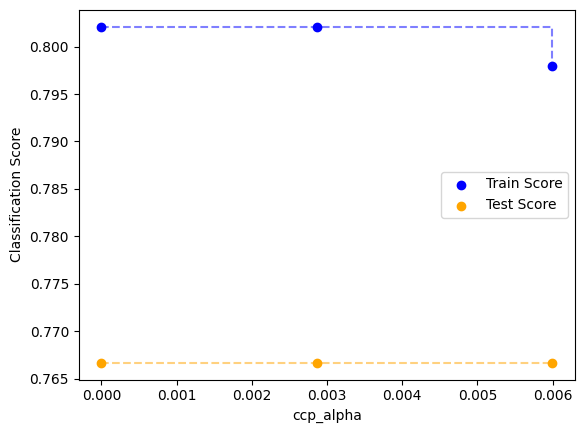

In [97]:
trainAcc = []
testAcc = []
numOfNode = []
depthOfTree = []

for alpha in c['ccp_alphas']:
    tempModel = DecisionTreeClassifier(criterion='entropy',
                                       max_depth=3,ccp_alpha=alpha)
    tempModel.fit(X_train,y_train)
    # predictions on traing data
    trainPred = tempModel.predict(X_train)
    # predictions on testing data 
    testPred = tempModel.predict(X_test)
    # training accuracy
    trainAcc.append(accuracy_score(y_train,trainPred.ravel()))
    # testing accuracy
    testAcc.append(accuracy_score(y_test,testPred.ravel()))
    numOfNode.append(tempModel.get_n_leaves())
    depthOfTree.append(tempModel.max_depth)
plt.plot(c['ccp_alphas'],trainAcc,
         color='blue',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],trainAcc,
         color='blue',label='Train Score')
plt.plot(c['ccp_alphas'],testAcc,
         color='orange',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],testAcc,
            color='orange',label='Test Score')
plt.ylabel('Classification Score')
plt.xlabel('ccp_alpha')
plt.legend()
plt.show()

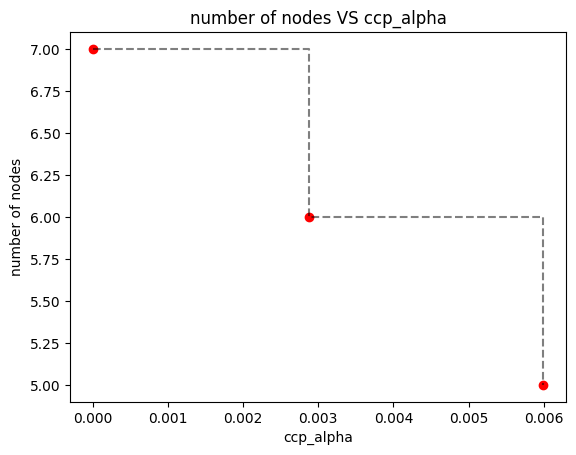

In [98]:
plt.plot(c['ccp_alphas'],numOfNode,
         color='black',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],numOfNode,
         color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('number of nodes')
plt.title('number of nodes VS ccp_alpha')
plt.show()

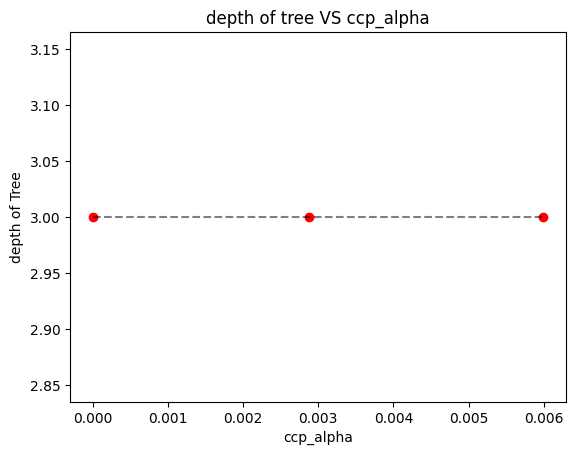

In [99]:
plt.plot(c['ccp_alphas'],depthOfTree,
         color='black',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],depthOfTree,
         color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('depth of Tree')
plt.title('depth of tree VS ccp_alpha')
plt.show()

In [100]:
print(f"Testing Accuracy is highest at ccp_alpha of {c['ccp_alphas'][-1]}")

Testing Accuracy is highest at ccp_alpha of 0.0059955011637032995


In [101]:
# final optimized model after prunning
# criterion -> entropy
# max_depth -> 3
# ccp_alpha -> 0.00724582698279122
finalClf = DecisionTreeClassifier(criterion=grid.best_params_['criterion'],
                                  max_depth=grid.best_params_['max_depth'],
                                  ccp_alpha=0.0059955011637032995)

In [102]:
# training DT
finalClf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0059955011637032995, criterion='entropy',
                       max_depth=3)

In [103]:
print(f'Train Accuracy of final model : {round(accuracy_score(y_train,finalClf.predict(X_train))*100,2)}')

Train Accuracy of final model : 79.79


In [104]:
print(f'Test Accuracy of final model : {round(accuracy_score(y_test,finalClf.predict(X_test))*100,2)}')

Test Accuracy of final model : 76.67


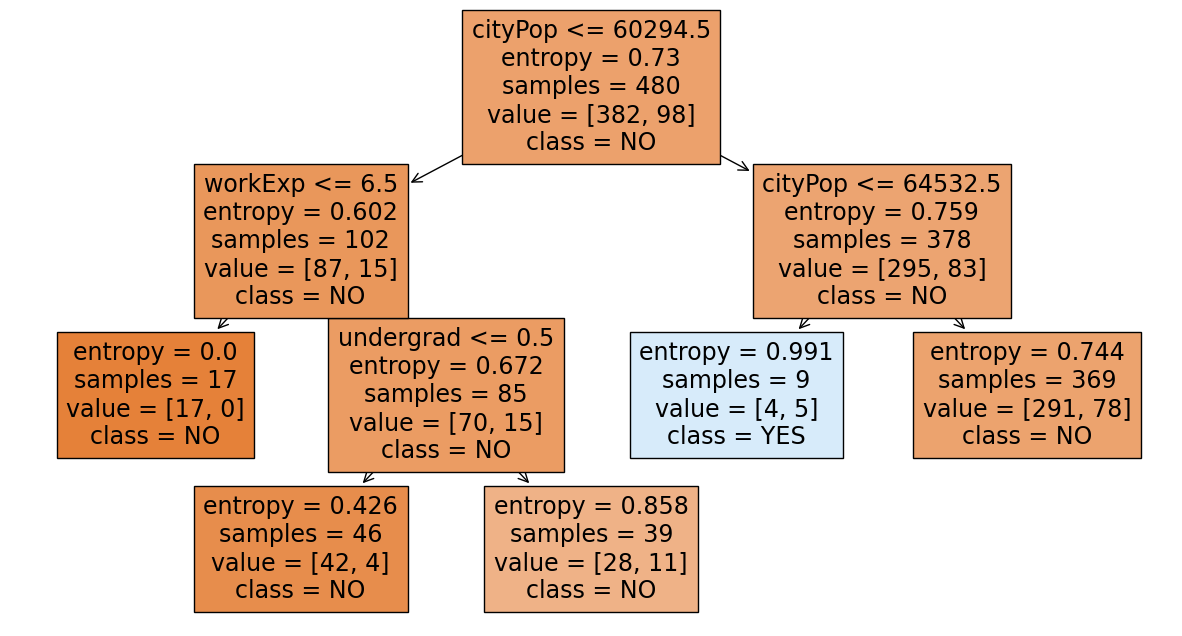

In [105]:
# visualize final Decision Tree 
plt.figure(figsize=(15,8))
tree.plot_tree(finalClf,
               feature_names=X.columns,
               class_names={0: 'NO', 1: 'YES'},
               filled=True)
plt.show()

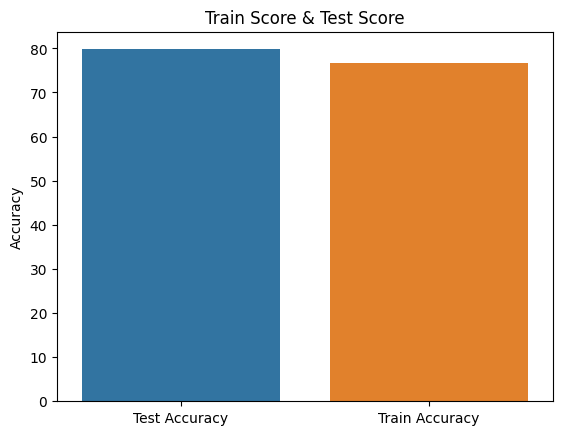

In [106]:
sns.barplot(x=['Test Accuracy','Train Accuracy'],
            y=[round(accuracy_score(y_train,finalClf.predict(X_train))*100,2),
              round(accuracy_score(y_test,finalClf.predict(X_test))*100,2)])
plt.ylabel('Accuracy')
plt.title('Train Score & Test Score')
plt.show()

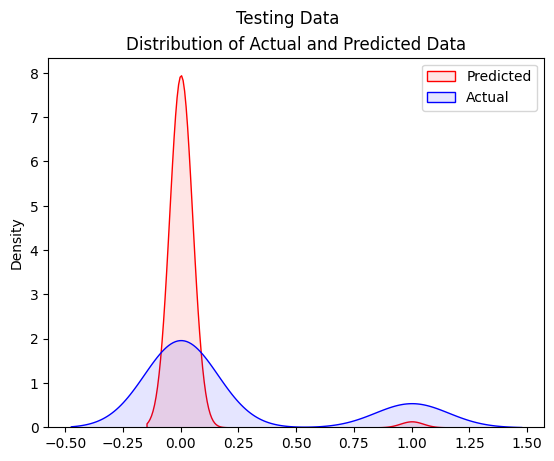

In [107]:
sns.distplot(finalClf.predict(X_test),hist=False,color='red',
                              kde_kws={'shade':True,'alpha':0.1})
sns.distplot(y_test,hist=False,color='blue',
             kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper right')
plt.title('Distribution of Actual and Predicted Data')
plt.suptitle('Testing Data')
plt.show()

In [108]:
# look for f1 score 
print(classification_report(y_test,finalClf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



In [109]:
# prediction on test data
testResult = X_test.copy(deep=True)
testResult['Account Status'] = finalClf.predict(X_test)
testResult['Account Status'].replace({0: 'Good', 1: 'Risky'},inplace=True)
testResult

,undergrad,mStatus,cityPop,workExp,urban,Account Status
110,0,2,32450,19,1,Good
419,0,1,138074,20,0,Good
565,0,0,31064,28,0,Good
77,1,1,118344,26,0,Good
181,0,0,36116,20,0,Good
...,...,...,...,...,...,...
399,0,2,74497,21,0,Good
340,1,1,54437,21,1,Good
148,0,1,197038,21,0,Good
494,0,2,197045,13,1,Good


## Decision Tree Classifier on fraud data with training accuracy of 79.79% , testing accuracy of 76.67% and 68%